### Esercitazione 2

### Integrazione Monte Carlo


Questa simulazione è suddivisa in due parti distinte, entrambe orientate allo studio e all’applicazione di tecniche stocastiche.

Si considera l’integrale definito su $[0, 1]$ della funzione $\frac{\pi}{2} \cos(\pi x / 2)$, il cui valore esatto è noto:

$$
I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi x}{2}\right) dx = 1
$$

L’obiettivo è stimare il valore dell’integrale $I$ utilizzando due approcci Monte Carlo per un numero di lanci $M \geq 10^4$

1. **Campionamento uniforme**: si estrae una sequenza di numeri casuali uniformemente distribuiti nell’intervallo $[0,1]$, successivamente si calcola l' integrale con il metodo della media:
$\frac{(b-a)}{N}\sum_{i=1}^N f(x_i)$



In [47]:
import matplotlib.pyplot as plt
import numpy as np

dati=np.loadtxt("Es2.1/dati.csv",delimiter=",")

Int=dati[:,0]
err=dati[:,1]
Int2=dati[:,2]
err2=dati[:,3]
N=100

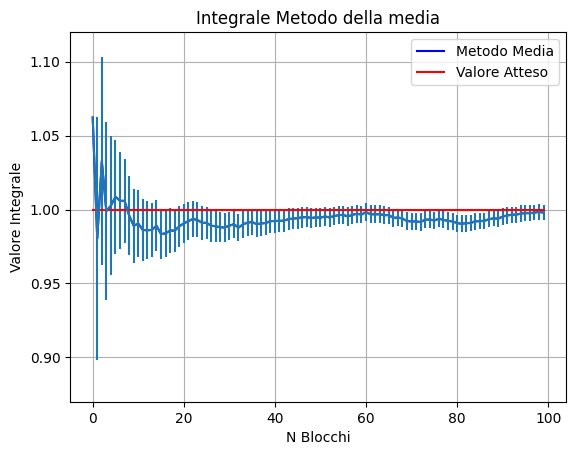

In [48]:
#metodo media
x=range(0,N)
plt.plot(x,Int,color='b',label="Metodo Media")
plt.errorbar(range(0,N),Int,yerr=err)
plt.title("Integrale Metodo della media")
plt.xlabel("N Blocchi")
plt.ylabel("Valore Integrale")
plt.ylim(0.87,1.12)
plt.grid()
plt.plot(x,[1]*len(x),color="red",label="Valore Atteso")
plt.legend()
plt.show()
plt.close()


2. **Campionamento per importance sampling**: si suddivide la funzione $f(x)$ in un prodotto $g(x)*p(x)$, dove la $p(x)$ è la distribuzione di probabilità scelta da noi in modo che sia molto simile alla $f(x)$, questo permetterà un errore minore dell' integrale.Le uniche imposizioni che abbiamo su $p(x)$ sono:
$\int_{\Omega} p(x) dx=1$

ed essendo una distribuzione di probabilità: $p(x)\geq0$      $\forall x \in \Omega$

La funzione scelta per $p(x)$ già normalizzata è:

$p(x) = \frac{3}{2} (1 - x^2)$

Essa è sempre positiva, in questo modo si evitano i problemi creati dalla funzione definita secondo il polinomio di taylor del coseno che ha dei punti negativi che violano le regole dell' importance sampling.

La funzione $g(x)$ è definita come il rapporto tra $f(x)$ e $ p(x)$:

$g(x) = \frac{f(x)}{p(x)} = \frac{\frac{\pi}{2} \cos\left(\frac{\pi}{2} x\right)}{\frac{3}{2} (1 - x^2)} = \frac{\pi \cos\left(\frac{\pi}{2} x\right)}{3 (1 - x^2)}.$


Si estrae casualmente un numero $ x $ nell’intervallo di integrazione, e un numero $ y$ nell’intervallo compreso tra 0 e il valore massimo della distribuzione di probabilità $ p(x)$. Successivamente, se $ y \leq p(x)$, allora il punto $ x$ viene accettato e si calcola il valore di $ g(x)$.



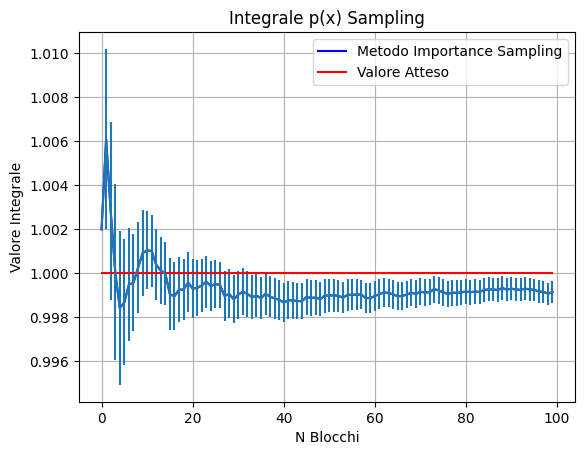

In [49]:
#metodo importance sampling
x=range(0,N)
plt.plot(x,Int2,color='b',label="Metodo Importance Sampling")
plt.errorbar(range(0,N),Int2,yerr=err2)
plt.plot(x,[1]*len(x),color="red",label="Valore Atteso")
plt.title("Integrale p(x) Sampling")
plt.xlabel("N Blocchi")
plt.ylabel("Valore Integrale")
#plt.ylim(0.87,1.12)
plt.grid()
plt.legend()
plt.show()
plt.close()

Come si può notare dai grafici l' importance sampling permette di ottenere una stima migliore dell' integrale, non tanto del valore numerico in se ma rispetto all' errore.

### Random Walk


In questa parte si studia il comportamento diffusivo di una particella che esegue un **Random Walk tridimensionale (RW)** a partire dall’origine. Vengono simulate due varianti:

1. **Random Walk su reticolo cubico**:
   - La particella si muove su un reticolo discreto con passo $a$.
   - A ogni passo, essa si sposta di $+a$ o $-a$ lungo uno degli assi cartesiani $x$, $y$ o $z$, scelto casualmente.

2. **Random Walk nel continuo**:
   - La particella effettua spostamenti di lunghezza $a = 1$ in direzioni casuali nel continuo tridimensionale.
   - La direzione viene selezionata uniformemente sulla sfera, tramite campionamento degli angoli solidi: $\theta \in [0, \pi]$ e $\phi \in [0, 2\pi]$.


Si eseguono $M=100$ simulazioni indipendenti di entrambe le tipologie di Random Walk con $a=1$.Si eseguono le simulazioni su $N=100$ passi, dove per ogni passo $i$, si calcola il valore quadratico medio della distanza dall’origine:

$$
\sqrt{\langle |\vec{r}_i|^2 \rangle}
$$

Per stimare la media e l’incertezza statistica, i $M$ Random Walk vengono suddivisi in $n=10000$ blocchi. All’interno di ciascun blocco si calcola $\langle |\vec{r}_i|^2 \rangle$, e da questi valori si ricavano media e deviazione standard per ciascun passo $i$.

I seguenti grafici mostrano:
- Un esempio di Random Walk sia nel caso Discreto che Continuo
- L’andamento di $\sqrt{\langle |\vec{r}_i|^2 \rangle}$ in funzione del numero di passi $i$.
- Le barre di errore associate.



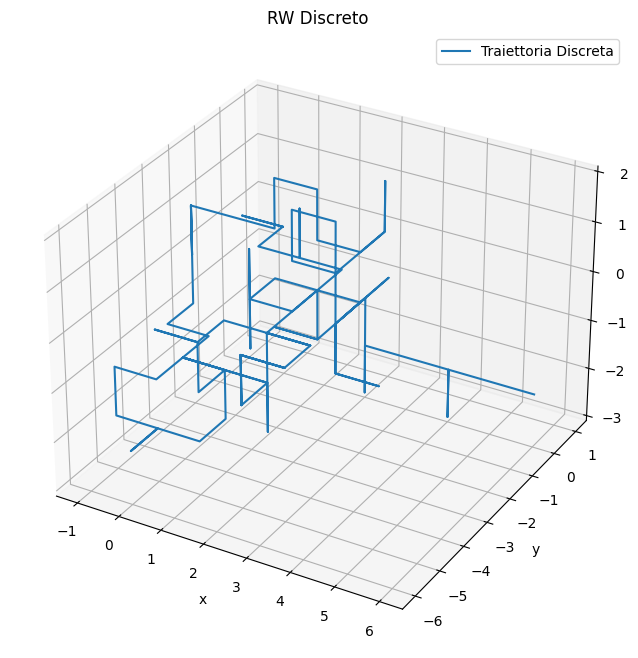

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit # Unica nuova importazione necessaria

#=======================================
# Grafico UNIFORME 3D
#=======================================
dati=np.loadtxt("Es2.2/Unif.csv",delimiter=",")
x=dati[:,0]
y=dati[:,1]
z=dati[:,2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, label='Traiettoria Discreta')
ax.set_title("RW Discreto")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()
plt.close()

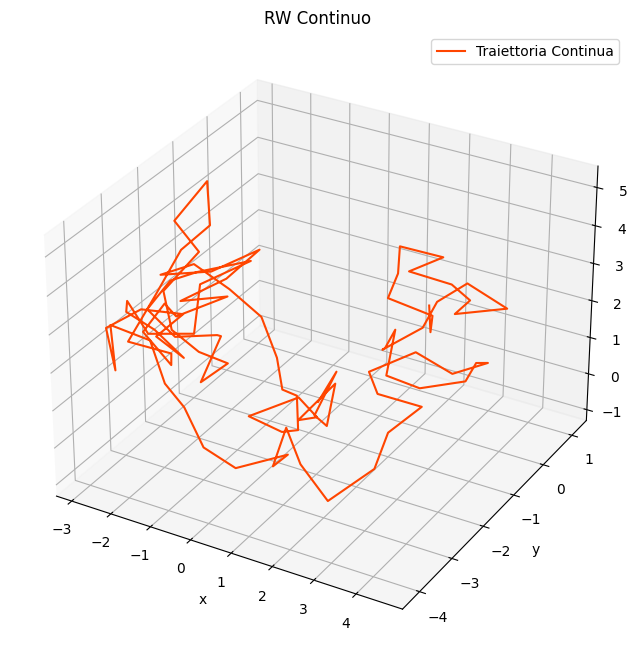

In [51]:

#=======================================
# Grafico ANGOLO SOLIDO 3D
#=======================================
dati2=np.loadtxt("Es2.2/Solid.csv",delimiter=",")
x2=dati2[:,0]
y2=dati2[:,1]
z2=dati2[:,2]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x2,y2,z2, label='Traiettoria Continua', color='orangered')
ax.set_title("RW Continuo")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.grid()
plt.legend()
plt.show()
plt.close()



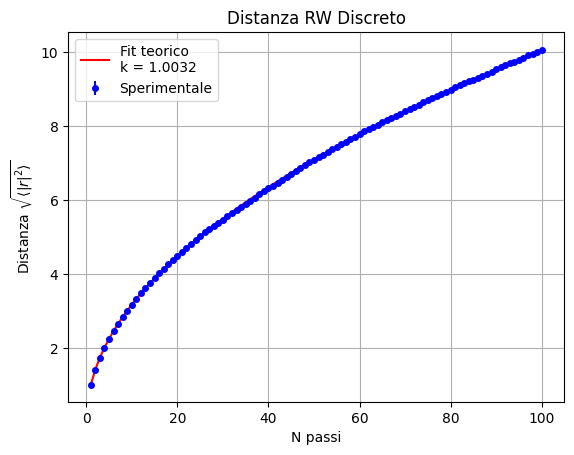

In [52]:
#=======================================
# Grafici delle distanze
#=======================================

def funzione_teorica(x, k):
    return k * np.sqrt(x)

dati3=np.loadtxt("Es2.2/distanze.csv",delimiter=",", skiprows=1)

steps = dati3[:,0]
r1    = dati3[:,1] # Distanza Reticolo
err1  = dati3[:,2] # Errore Reticolo
r2    = dati3[:,3] # Distanza Continuo
err2  = dati3[:,4] # Errore Continuo

# RW Discreto

# Calcolo il valore ottimale di k per i dati discreti

popt, pcov = curve_fit(funzione_teorica, steps[1:], r1[1:])
k_discreto = popt[0]


plt.errorbar(steps, r1, yerr=err1, fmt='o', markersize=4, label="Sperimentale", color="blue")


label_fit = f'Fit teorico\nk = {k_discreto:.4f}'
plt.plot(steps, funzione_teorica(steps, k_discreto), label=label_fit, color="red")

plt.grid()
plt.legend()
plt.title("Distanza RW Discreto")
plt.xlabel("N passi")
plt.ylabel("Distanza $\sqrt{\langle |r|^2 \\rangle}$")
plt.show()
plt.close()



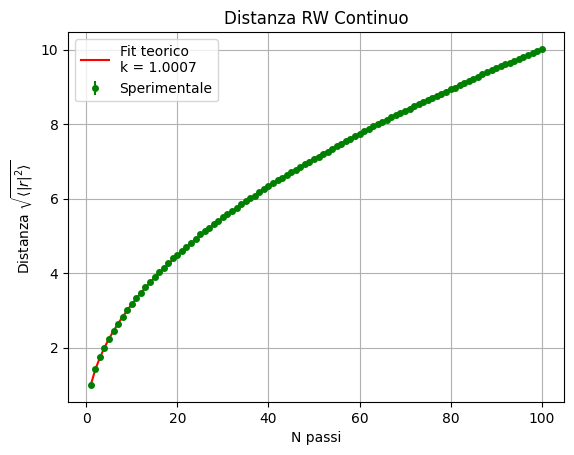

In [53]:
#RW Continuo

# Calcolo il valore ottimale di k per i dati continui
popt, pcov = curve_fit(funzione_teorica, steps[1:], r2[1:])
k_continuo = popt[0]


plt.errorbar(steps, r2, yerr=err2, fmt='o', markersize=4, label="Sperimentale", color="green")

#curva teorica con il nuovo k
label_fit_cont = f'Fit teorico\nk = {k_continuo:.4f}'
plt.plot(steps, funzione_teorica(steps, k_continuo), label=label_fit_cont, color="red")

plt.grid()
plt.legend()
plt.title("Distanza RW Continuo")
plt.xlabel("N passi")
plt.ylabel("Distanza $\sqrt{\langle |r|^2 \\rangle}$")
plt.show()
plt.close()

Si verifica che la **dipendenza diffusa** della distanza media dal numero di passi segue una funzione:

$
f(N) = k \sqrt{N}
$


Dove per $a=1$ ci si aspetta che $k=1$, un valore molto vicino a quello ottenuto sperimentalmente.
Tale dipendenza è attesa in sistemi diffusivi che seguono l' equazione di diffusione stocastica.
